# 1: Data transformation and exploratory data analysis

### (Exercise 3 from notebook "Exercises in DT and EDA")

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

---

### Assemble necessary libraries:

In [1]:
# Disable FutureWarnings while wokring for better readability
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Fetch adult dataset from online (UCIMLrepo)
from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets
X["income"] = y
adult_data = X.copy()

---

### **First look at the data**

Understanding the dataset features and their entries

In [4]:
adult_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Take aways from looking at the data head

"fnlwgt" feature:

- Unsure of what the feature "fnlwgt" describes, perhaps a discriminater feature from the survey.
- Conclude that "fnlwgt" dosen't seem to have a connection to the remaining features. Therefore is not relevant to include in analysis.

In [5]:
# Dropping features that are not needed for analysis
# Drop "fnlwgt"
adult_data.drop(columns=['fnlwgt'], inplace=True)
# Drop "education-num"
adult_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Handling missing values**

Look for missing values in the data, understand the situation and act accordingly.

In [6]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      47876 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48568 non-null  object
 13  income          48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


### Take aways from looking at the data info

"workclass" 963 missing, "occupation" 966 missing and "native-country" 274 missing.

- Impactful amount of mising values.
- These three features are useful for income prediction.
- Dropping rows with NA's would reduce dataset size.
- Since they are categorical values, we can fill NA's with a "Unknown" category, and still use the remain data in the rows for analysis.

In [7]:
# Fill missing values with "Unknown" string/category
# workclass:
adult_data['workclass'].fillna('Unknown', inplace=True)
# occupation:
adult_data['occupation'].fillna('Unknown', inplace=True)
# native-country:
adult_data['native-country'].fillna('Unknown', inplace=True)
# Replace "?" with "Unknown" in categorical features
adult_data['workclass'] = adult_data['workclass'].replace('?', 'Unknown')
adult_data['native-country'] = adult_data['native-country'].replace('?', 'Unknown')

# Confirm that it works as intended
adult_data.info()
print(adult_data['workclass'].value_counts())
print(adult_data['native-country'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  income          48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            19

### **Label inconsistency of the "income" feature**

The "income" feature seems to be encoded wrong. The categorical value "income" is supposed to do sort people into one of two categories: "<=50k" or ">50k" income.
We inspect it using value_counts() on the "income" feature.

In [8]:
adult_data['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

### Take aways of value_counts() inspection

- Redundancy, inproper encoding introducing 4 categories instead of 2.
- "<=50k" and "<=50k."
- ">50k" and ">50k."
- Decribing the same category, we merge the pairs, removing the dot.
- This will prep the feature for better analysis.

In [9]:
# Map the encoding into proper one, merging the the categories with shared meaning
adult_data['income'] = adult_data['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
# Ensure it worked as intended
adult_data['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

---

### **EDA: visualizing distribution of features **

For categorical features, we use countplots set up in a loop to easily show distributions 

--- workclass ---
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


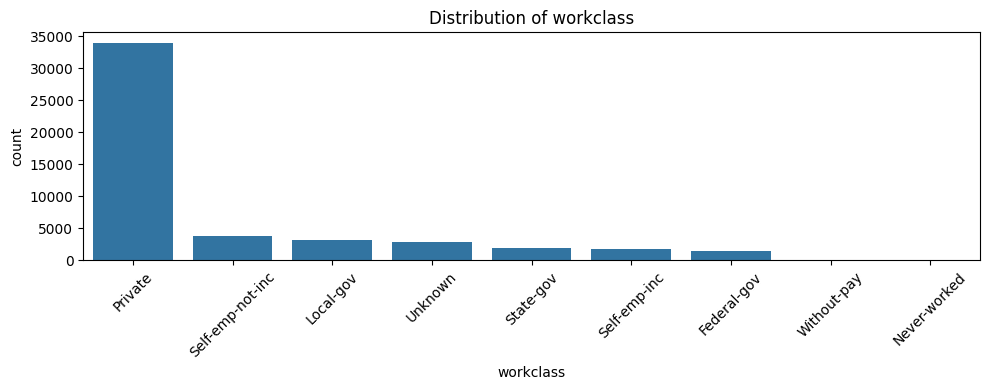

--- education ---
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


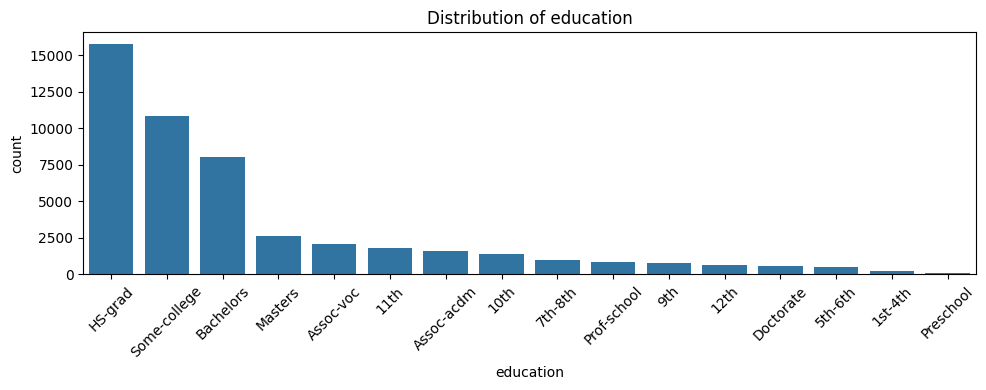

--- marital-status ---
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


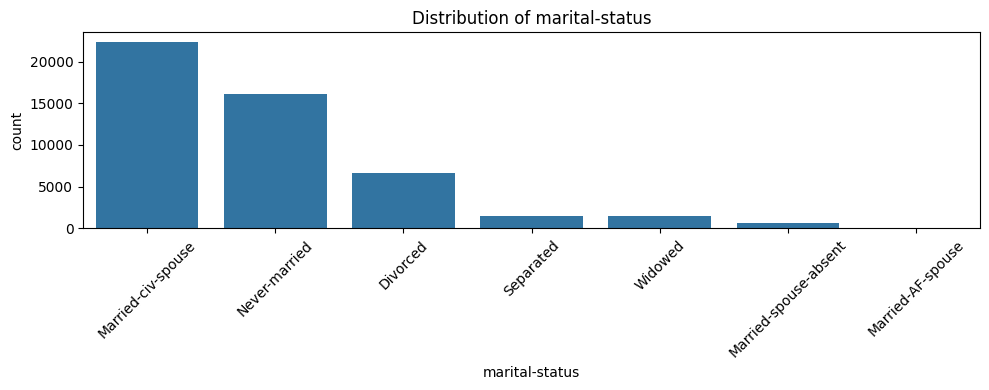

--- occupation ---
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Unknown               966
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


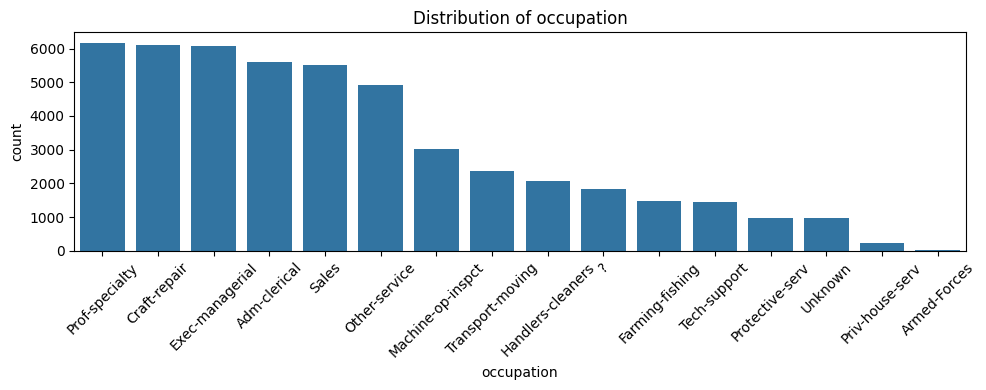

--- relationship ---
relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


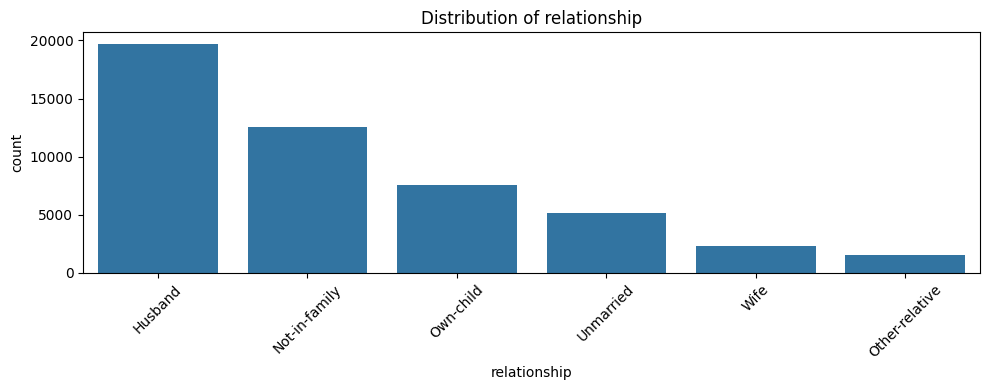

--- race ---
race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


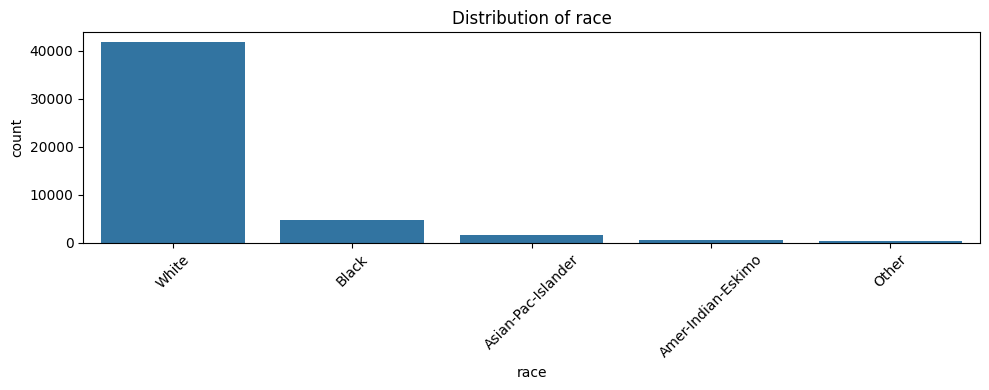

--- sex ---
sex
Male      32650
Female    16192
Name: count, dtype: int64


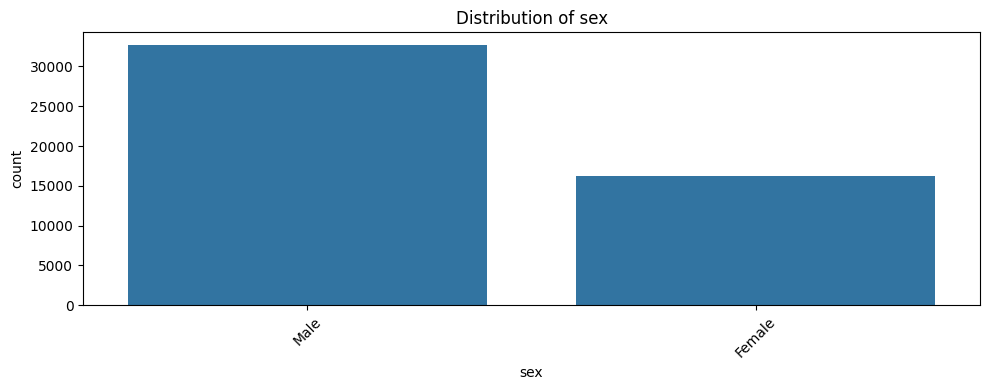

--- native-country ---
native-country
United-States                 43832
Mexico                          951
Unknown                         857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                 

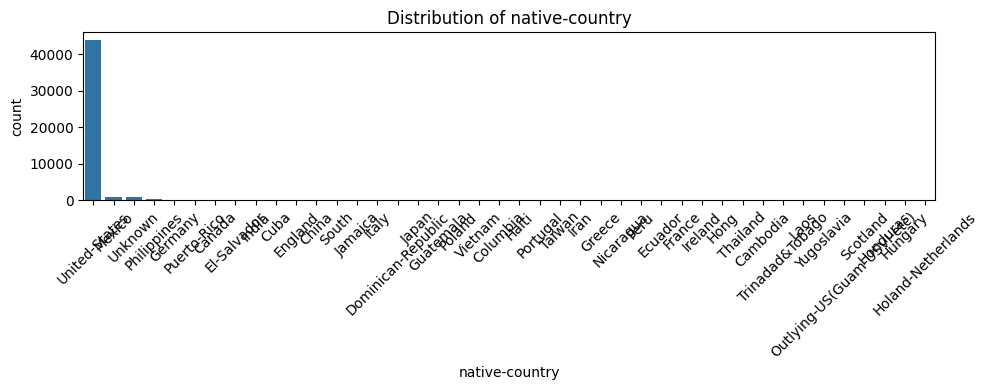

--- income ---
income
<=50K    37155
>50K     11687
Name: count, dtype: int64


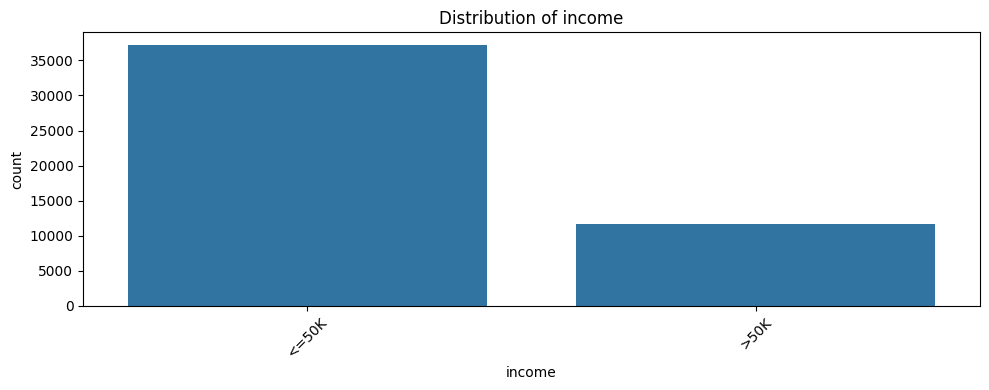

In [10]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country', 'income']

for col in categorical_cols:
    print(f"--- {col} ---")
    print(adult_data[col].value_counts())
    
    plt.figure(figsize=(10, 4))
    sns.countplot(data=adult_data, x=col, order=adult_data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

*For visualizing the numerical features we use the same method as the categoricals, but instead use histograms to show distribution

--- age ---
count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


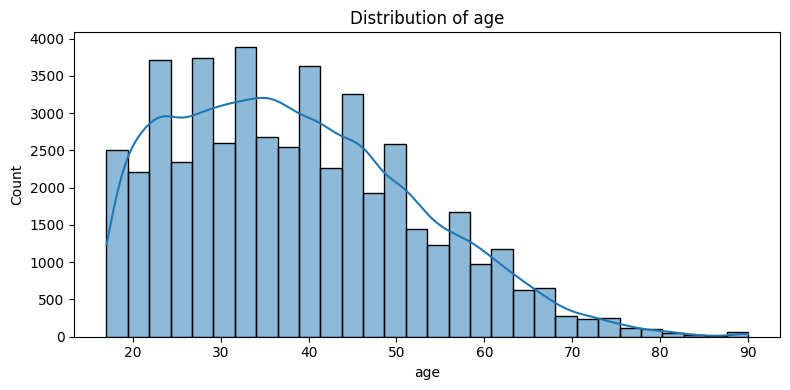

--- education-num ---
count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64


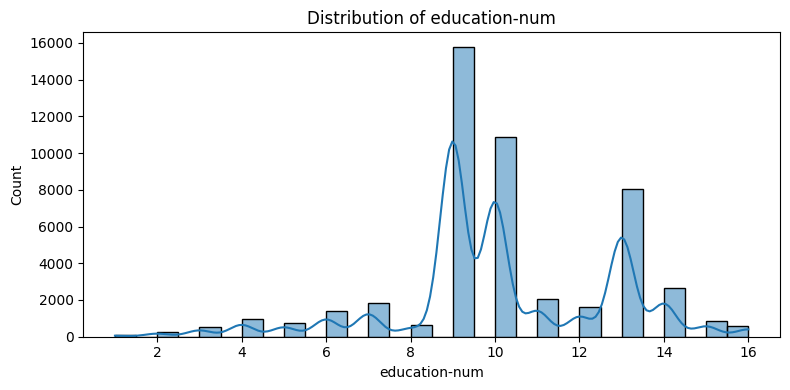

--- capital-gain ---
count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


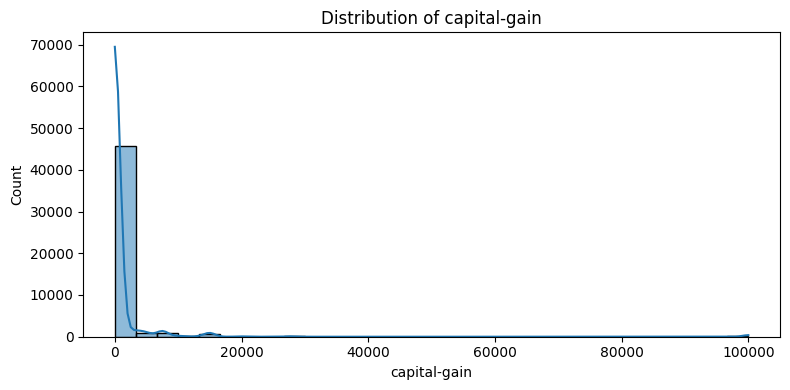

--- capital-loss ---
count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


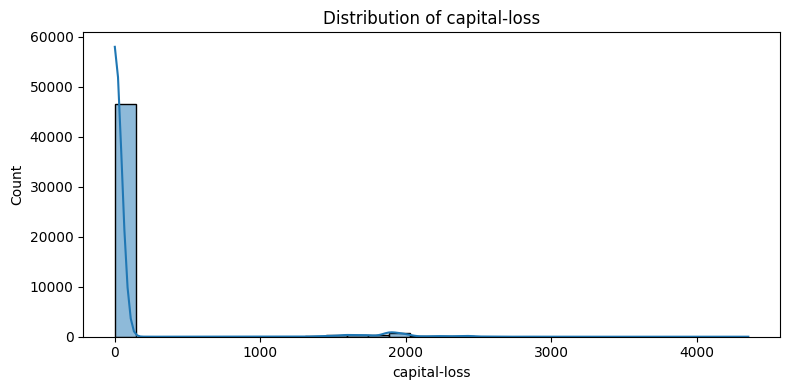

--- hours-per-week ---
count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


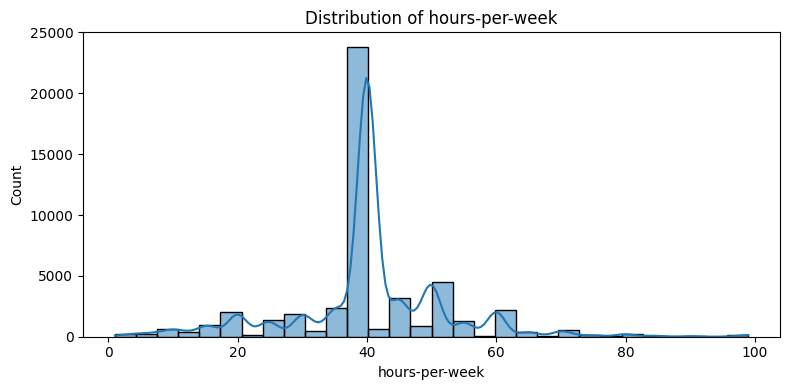

In [11]:
numerical_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in numerical_cols:
    print(f"--- {col} ---")
    print(adult_data[col].describe())
    
    plt.figure(figsize=(8, 4))
    sns.histplot(data=adult_data, x=col, bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

### **EDA: Educations & Workclass impact on Income**

Lets say we wanted to make a income prediction or analysis, then it is importan to explore features that higly discriminate wether peopler are making more or less that 50K.

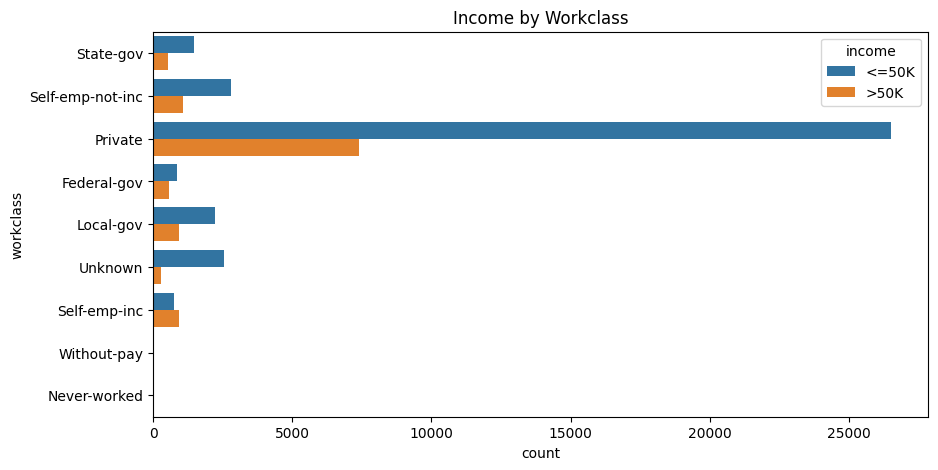

In [12]:
# Attempting to visualize correlation between workclass and income category with a count plot
plt.figure(figsize=(10,5))
sns.countplot(y='workclass', hue='income', data=adult_data)
plt.title("Income by Workclass")
plt.show()

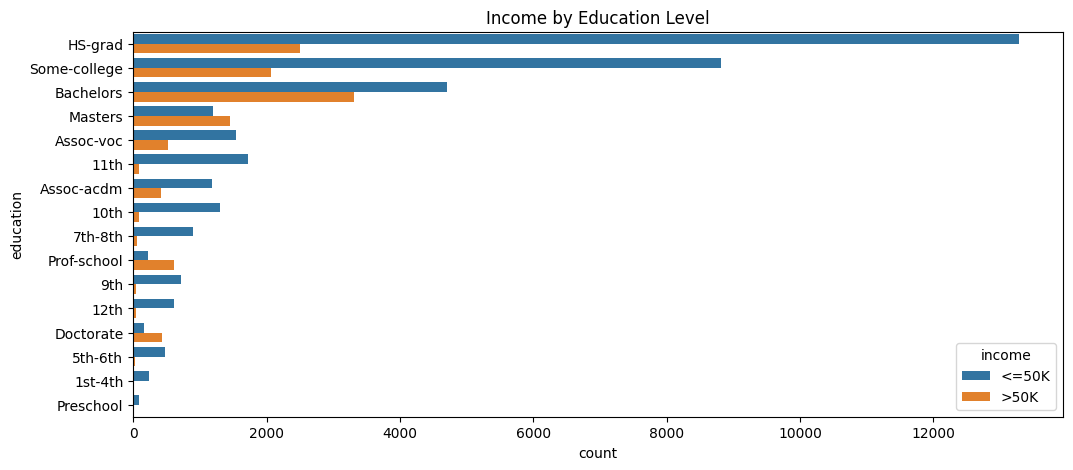

In [13]:
# Attempting to visualize correlation between education and income category with a count plot
plt.figure(figsize=(12,5))
# Sort by value_counts with the highest amount of records
sns.countplot(y='education', hue='income', data=adult_data, order=adult_data['education'].value_counts().index)
plt.title("Income by Education Level")
plt.show()

### Take aways from Workclass & Educations plotting

- Workclasses have varrying low vs high income ratios.
- This means some Workclasses make more/less than others on average.
- Higher education generally seems to mean higher income.

Lastly we compare the correlation between all numeric featuers, this is done using a correlation heapmap

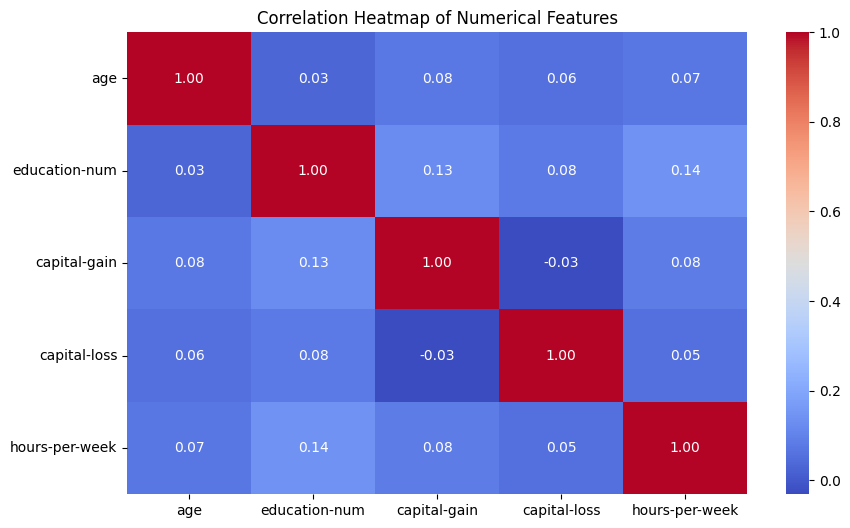

In [14]:
# Select only numeric columns
numeric_data = adult_data.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Take aways from correlation heatmap

* The heatmap clearly states that there are no correlation between numeric to numeric values in the data.

Lastly we compare a categorical feature cs a numeric feautes in the below visualization:

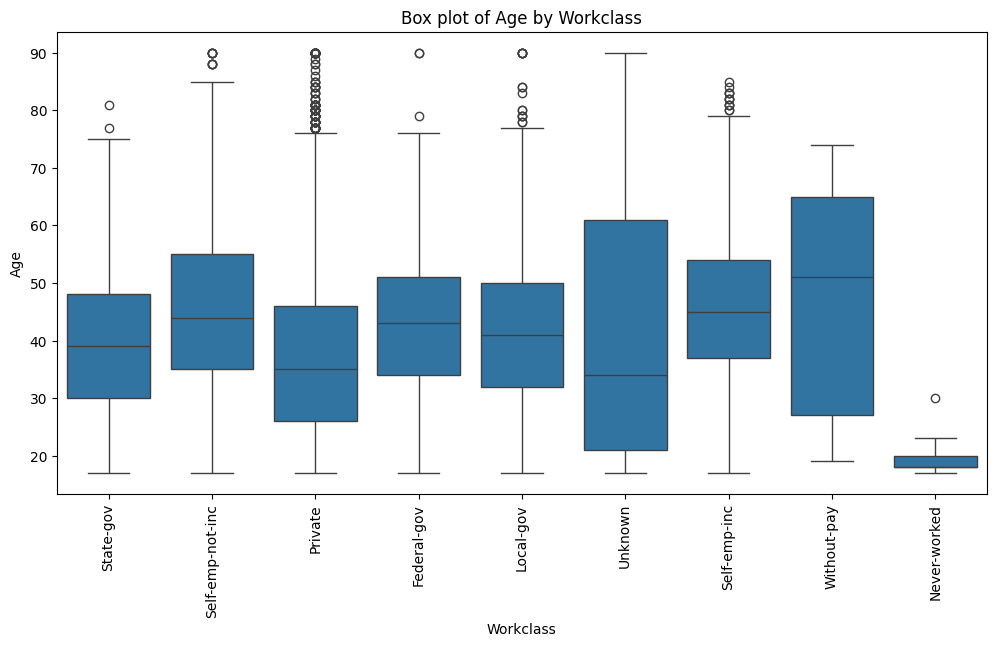

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='workclass', y='age', data=adult_data)
plt.xticks(rotation=90)
plt.title('Box plot of Age by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Age')
plt.show()

Lets see if there is any correlation between the two features

In [16]:
# One-hot encode the 'workclass' column
workclass_encoded = pd.get_dummies(adult_data['workclass'], prefix='workclass')
relevant_data = pd.concat([adult_data[['age']], workclass_encoded], axis=1)
correlation_matrix = relevant_data.corr()
age_workclass_correlation = correlation_matrix.loc['age', workclass_encoded.columns]
print(age_workclass_correlation)

workclass_Federal-gov         0.049867
workclass_Local-gov           0.057935
workclass_Never-worked       -0.019564
workclass_Private            -0.191263
workclass_Self-emp-inc        0.098962
workclass_Self-emp-not-inc    0.142956
workclass_State-gov           0.013029
workclass_Unknown             0.026931
workclass_Without-pay         0.013073
Name: age, dtype: float64


Numbers again seem to be very low, indicating no correlation between the two features

---